In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings

warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
tianjin = '117.4961975657171,37.86803012379458,7.296245301137998 119.8081837995413,37.9250916349774,-34.2681049860788 119.8416643486643,39.32481316399956,-31.12524274095152 117.9501096884913,39.37523731857854,39.41212136434525 117.4961975657171,37.86803012379458,7.296245301137998'



coord_list = tianjin.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [3]:
df_test = pd.read_csv("voy_path/COSCO_FOS_VRKR6_26.csv")
df_test

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,127.0882,34.1223,16.0,270.0,2022-11-16 16:56:08.041108,2022-11-16 07:55:49,2022-11-16 04:19:07,under way using engine,184.436450,306.205403
1,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,127.0609,34.1211,16.1,267.0,2022-11-16 17:01:11.033821,2022-11-16 08:00:55,2022-11-16 04:19:07,under way using engine,186.658612,312.035073
2,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,126.6711,34.0831,16.1,262.0,2022-11-16 18:16:53.451054,2022-11-16 09:14:25,2022-11-16 04:19:07,under way using engine,220.108466,367.952814
3,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,126.6067,34.0795,16.0,277.0,2022-11-16 18:26:58.801742,2022-11-16 09:26:25,2022-11-16 04:19:07,under way using engine,225.577733,374.509054
4,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-17 09:00:00,126.5502,34.0820,16.2,280.0,2022-11-16 18:42:07.917210,2022-11-16 09:37:09,2022-11-16 04:19:07,under way using engine,230.117608,387.353392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8286,35.0767,0.9,80.0,2022-11-21 18:05:52.289081,2022-11-21 08:45:01,2022-11-21 08:37:08,under way using engine,11.938104,105.884565
529,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8303,35.0770,0.1,91.0,2022-11-21 20:12:03.039219,2022-11-21 10:46:03,2022-11-21 10:49:07,moored,11.983151,956.161110
530,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8302,35.0772,0.0,91.0,2022-11-21 20:17:05.890117,2022-11-21 10:52:05,2022-11-21 10:55:06,moored,12.004568,NaN
531,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8300,35.0772,0.0,91.0,2022-11-21 20:42:20.130436,2022-11-21 11:15:59,2022-11-21 11:13:06,moored,12.003097,NaN


In [4]:
# if Point(LONGITUDE, LATITUDE).within(poly):

In [5]:
df_test.sort_values(by="timestamp", ignore_index=True, inplace=True)

In [6]:
for idx in df_test.index:
    LONGITUDE = df_test.loc[idx, "longitude"]
    LATITUDE = df_test.loc[idx, "latitude"]
    heading = df_test.loc[idx, "heading"]
    speed = df_test.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
        

224


In [7]:
df_test_2 = df_test.loc[idx:,]
df_test_2.reset_index(inplace=True)

In [8]:
# df_test_2.to_csv("voy_path/COSCO_test.csv", encoding="utf-8 sig", header=True, index=False)

In [9]:
distance = 0
for idx in df_test_2.index:
    if idx != 0:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        distance += haversine(current_coord, previous_current_coord, unit="km")

In [10]:
distance

1325.7178036900816

In [11]:
1348.5265119662952 / 20

67.42632559831476

In [12]:
overall_length = 1348.5265119662952
segment_length = overall_length/20

In [13]:
overall_length = distance
segment_length = overall_length/20

In [14]:
segment_length

66.28589018450408

In [15]:
temp_accu_length = 0
segmenting_index_list = []
for idx in df_test_2.index:
    
    if idx == 0:
        previous_length = 0
    else:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        current_length = haversine(current_coord, previous_current_coord, unit="km")
        temp_accu_length += current_length
        
        if temp_accu_length >= segment_length:
            print(temp_accu_length)
#             segmenting_index_list.append(idx)
            
            
            length_error_1 = temp_accu_length - segment_length
            length_error_2 = temp_accu_length - segment_length - previous_length
            if length_error_1 > length_error_2:
                segmenting_index_list.append(idx)
            else:
                segmenting_index_list.append(idx - 1)
                
            
            temp_accu_length = 0
            
        previous_length = current_length
segmenting_index_list.append(df_test_2.index[-1])


74.30519420981277
71.40034240338963
68.15846623867361
70.09483984884616
82.56082611932622
70.11024138294692
70.80694547475466
123.33520789742383
66.77633122964147
68.41320417664105
67.06528426971842
68.09801973905442
66.94987809636005
69.18844520431976
68.52054235605213
66.76948214087491
70.40829269906936
68.89616252544742


In [16]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [17]:
for idx, index in enumerate(segmenting_index_list):
    if idx == 0:
        d = df_test_2[0:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
    else:
        d = df_test_2[previous_index:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
        
    previous_index = index

74.30519420981277
71.40034240338963
68.15846623867361
70.09483984884616
82.56082611932622
70.11024138294692
70.80694547475466
123.33520789742383
66.77633122964147
68.41320417664105
67.06528426971842
68.09801973905442
66.94987809636005
69.18844520431976
68.52054235605213
66.76948214087491
70.40829269906936
68.89616252544742
13.86009767772916


In [18]:
for i in range(len(segmenting_index_list)):
    d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
    mean_speed = d["speed"].mean()
    print(i, mean_speed)

0 14.041176470588237
1 16.32
2 16.349999999999998
3 16.664285714285715
4 18.464285714285715
5 19.26
6 19.342857142857145
7 18.9
8 19.39090909090909
9 19.3
10 17.296153846153842
11 15.634482758620688
12 17.10909090909091
13 16.139999999999997
14 15.233333333333333
15 16.40344827586207
16 16.277777777777775
17 11.666666666666666
18 5.2749999999999995


In [37]:
print("COSCO_FOS_24")
print("전항지 출항 시각",df_test_2.loc[df_test_2.index[0], "timestamp"])
print("부산 도착 시각",df_test_2.loc[df_test_2.index[-1], "timestamp"])

COSCO_FOS_24
전항지 출항 시각 2022-11-19 22:24:43.599696
부산 도착 시각 2022-11-22 01:14:53.431509


In [119]:
sample = pd.read_csv("voy_path/COSCO_FOS_VRKR6_24.csv")
sample.sort_values(by="timestamp", ignore_index=True, inplace=True)
for idx in sample.index:
    LONGITUDE = sample.loc[idx, "longitude"]
    LATITUDE = sample.loc[idx, "latitude"]
    heading = sample.loc[idx, "heading"]
    speed = sample.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
sample = sample.loc[idx:,]
sample.reset_index(inplace=True)


167


In [120]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - distance // km_h) * 60)
    duration = datetime.timedelta(hours=hour,minutes=minute)
    return duration

In [121]:
# 억까 방지
busan_berth = '128.7362432822305,34.91571835540296,5.941836244531453 128.8816505843355,34.93956159255044,9.088787041386029 128.8718190496849,35.09310779849003,8.308118991212194 128.7247817257968,35.08647052441917,-9.228016031556635 128.7362432822305,34.91571835540296,5.941836244531453'
coord_list = busan_berth.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly_busan = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [122]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

In [123]:
sample

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,167,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:30:00,117.8793,38.9562,12.9,101.0,2022-11-02 09:18:39.641081,2022-11-02 00:17:58,2022-11-02 12:07:08,under way using engine,1067.349086,1466.086627
1,168,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:30:00,117.9418,38.9478,15.0,101.0,2022-11-02 09:33:50.357532,2022-11-02 00:30:43,2022-11-02 12:31:11,under way using engine,1061.972422,1649.047211
2,169,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:30:00,117.9841,38.9418,14.5,104.0,2022-11-02 09:43:54.080027,2022-11-02 00:38:56,2022-11-02 12:43:08,under way using engine,1058.321482,1591.964105
3,170,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:30:00,118.0113,38.9371,9.2,127.0,2022-11-02 09:48:58.031060,2022-11-02 00:45:45,2022-11-02 12:43:08,under way using engine,1055.940023,1321.332815
4,171,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-11-01 01:30:00,118.0685,38.9206,15.0,110.0,2022-11-02 10:04:04.941292,2022-11-02 01:00:57,2022-11-02 01:01:26,under way using engine,1050.663756,1631.486939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,473,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8247,35.0773,0.0,91.0,2022-11-04 20:13:03.886599,2022-11-04 11:09:51,2022-11-04 11:07:05,under way using engine,11.985248,NaN
307,474,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8246,35.0772,0.0,91.0,2022-11-04 20:18:07.878970,2022-11-04 11:15:24,2022-11-04 11:07:05,under way using engine,11.973778,NaN
308,475,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8249,35.0774,0.1,91.0,2022-11-04 20:58:30.521894,2022-11-04 11:57:20,2022-11-04 11:49:08,under way using engine,11.997099,957.274033
309,476,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8249,35.0775,0.0,91.0,2022-11-04 21:03:31.914746,2022-11-04 12:00:35,2022-11-04 12:01:08,under way using engine,12.008209,NaN


In [124]:
stop_index = check_ATA(sample)

In [125]:
stop_index

292

In [126]:
ATA = pd.to_datetime(sample.loc[stop_index,"timestamp"])

# 감속률 적용

In [127]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = current_speed / init_seg_df["speed"].mean()
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [128]:
ddd = sample.loc[20:,:]
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,187,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,118.8891,38.7763,14.6,120.0,2022-11-02 12:45:36.133624,2022-11-02 03:45:06,2022-11-02 03:31:09,under way using engine,978.757478,1481.514868,2022-11-04 08:31:36.133624,2022-11-04 16:30:58.726927,0 days 07:59:22.593303
21,188,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,118.8997,38.7718,14.8,121.0,2022-11-02 12:50:39.054801,2022-11-02 03:47:14,2022-11-02 03:31:09,under way using engine,977.716914,1498.803154,2022-11-04 08:03:39.054801,2022-11-04 16:30:58.726927,0 days 08:27:19.672126
22,189,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,118.7096,38.7970,14.8,102.0,2022-11-02 12:55:42.639616,2022-11-02 03:55:05,2022-11-02 03:31:09,under way using engine,994.019358,1523.794186,2022-11-04 08:08:42.639616,2022-11-04 16:30:58.726927,0 days 08:22:16.087311
23,190,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,118.9893,38.7532,14.8,116.0,2022-11-02 13:05:47.601236,2022-11-02 04:05:13,2022-11-02 03:31:09,under way using engine,969.750297,1486.590631,2022-11-04 08:18:47.601236,2022-11-04 16:30:58.726927,0 days 08:12:11.125691
24,191,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,119.3424,38.7003,14.8,100.0,2022-11-02 14:47:46.129923,2022-11-02 05:43:49,2022-11-02 03:31:09,under way using engine,939.254186,1439.841243,2022-11-04 10:04:46.129923,2022-11-04 16:30:58.726927,0 days 06:26:12.597004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,454,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8464,34.8583,8.2,0.0,2022-11-04 15:50:36.054255,2022-11-04 06:48:49,2022-11-04 06:37:07,under way using engine,12.617614,16.127267,2022-11-04 20:00:36.054255,2022-11-04 16:30:58.726927,0 days 03:29:37.327328
288,455,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8460,34.8763,9.5,1.0,2022-11-04 16:00:41.565432,2022-11-04 06:55:55,2022-11-04 06:55:05,under way using engine,10.653148,13.310025,2022-11-04 19:36:41.565432,2022-11-04 16:30:58.726927,0 days 03:05:42.838505
289,456,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8456,34.8979,6.7,1.0,2022-11-04 16:05:45.080566,2022-11-04 07:04:59,2022-11-04 07:01:08,under way using engine,8.321438,11.605087,2022-11-04 21:11:45.080566,2022-11-04 16:30:58.726927,0 days 04:40:46.353639
290,457,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8457,34.9066,4.6,353.0,2022-11-04 16:15:50.577107,2022-11-04 07:11:05,2022-11-04 07:14:58,under way using engine,7.402676,13.551468,2022-11-04 23:41:50.577107,2022-11-04 16:30:58.726927,0 days 07:10:51.850180


In [129]:
ddd["eta"] = pd.to_datetime(ddd["eta"])


In [130]:
ddd["error"] = abs(ddd["ETA"] - ddd["ATA"])

In [131]:
ddd["AIS_ETA_error"] = abs(ddd["eta"] - ddd["ATA"])

In [132]:
ddd.drop(columns=["mmsi", "imo", "CAPACITY",'estimated_fuel_consumption'], inplace=True)

In [133]:
ddd

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,ETA,ATA,error,AIS_ETA_error
20,187,COSCO FOS,KRBNP,2022-11-04 07:00:00,118.8891,38.7763,14.6,120.0,2022-11-02 12:45:36.133624,2022-11-02 03:45:06,2022-11-02 03:31:09,under way using engine,978.757478,2022-11-04 08:31:36.133624,2022-11-04 16:30:58.726927,0 days 07:59:22.593303,0 days 09:30:58.726927
21,188,COSCO FOS,KRBNP,2022-11-04 07:00:00,118.8997,38.7718,14.8,121.0,2022-11-02 12:50:39.054801,2022-11-02 03:47:14,2022-11-02 03:31:09,under way using engine,977.716914,2022-11-04 08:03:39.054801,2022-11-04 16:30:58.726927,0 days 08:27:19.672126,0 days 09:30:58.726927
22,189,COSCO FOS,KRBNP,2022-11-04 07:00:00,118.7096,38.7970,14.8,102.0,2022-11-02 12:55:42.639616,2022-11-02 03:55:05,2022-11-02 03:31:09,under way using engine,994.019358,2022-11-04 08:08:42.639616,2022-11-04 16:30:58.726927,0 days 08:22:16.087311,0 days 09:30:58.726927
23,190,COSCO FOS,KRBNP,2022-11-04 07:00:00,118.9893,38.7532,14.8,116.0,2022-11-02 13:05:47.601236,2022-11-02 04:05:13,2022-11-02 03:31:09,under way using engine,969.750297,2022-11-04 08:18:47.601236,2022-11-04 16:30:58.726927,0 days 08:12:11.125691,0 days 09:30:58.726927
24,191,COSCO FOS,KRBNP,2022-11-04 07:00:00,119.3424,38.7003,14.8,100.0,2022-11-02 14:47:46.129923,2022-11-02 05:43:49,2022-11-02 03:31:09,under way using engine,939.254186,2022-11-04 10:04:46.129923,2022-11-04 16:30:58.726927,0 days 06:26:12.597004,0 days 09:30:58.726927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,454,COSCO FOS,KRBNP,2022-11-04 08:00:00,128.8464,34.8583,8.2,0.0,2022-11-04 15:50:36.054255,2022-11-04 06:48:49,2022-11-04 06:37:07,under way using engine,12.617614,2022-11-04 20:00:36.054255,2022-11-04 16:30:58.726927,0 days 03:29:37.327328,0 days 08:30:58.726927
288,455,COSCO FOS,KRBNP,2022-11-04 08:00:00,128.8460,34.8763,9.5,1.0,2022-11-04 16:00:41.565432,2022-11-04 06:55:55,2022-11-04 06:55:05,under way using engine,10.653148,2022-11-04 19:36:41.565432,2022-11-04 16:30:58.726927,0 days 03:05:42.838505,0 days 08:30:58.726927
289,456,COSCO FOS,KRBNP,2022-11-04 08:00:00,128.8456,34.8979,6.7,1.0,2022-11-04 16:05:45.080566,2022-11-04 07:04:59,2022-11-04 07:01:08,under way using engine,8.321438,2022-11-04 21:11:45.080566,2022-11-04 16:30:58.726927,0 days 04:40:46.353639,0 days 08:30:58.726927
290,457,COSCO FOS,KRBNP,2022-11-04 08:00:00,128.8457,34.9066,4.6,353.0,2022-11-04 16:15:50.577107,2022-11-04 07:11:05,2022-11-04 07:14:58,under way using engine,7.402676,2022-11-04 23:41:50.577107,2022-11-04 16:30:58.726927,0 days 07:10:51.850180,0 days 08:30:58.726927


에러가 커졌을때는 왜 커졌는지 확인 필요할듯.

if ETA > ATA:
error = ETA - ATA
else
val = abs(ETA-ATA)


In [134]:
ddd["error"].max()

Timedelta('0 days 08:27:19.672126')

In [135]:
ddd["error"].mean()

Timedelta('0 days 02:17:54.735858477')

In [136]:
ddd.sort_values(by="error")

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,ETA,ATA,error,AIS_ETA_error
197,364,COSCO FOS,KRBNP,2022-11-04 07:00:00,127.3233,34.1052,12.5,83.0,2022-11-04 06:45:29.990445,2022-11-03 21:44:52,2022-11-02 05:02:27,under way using engine,167.386636,2022-11-04 16:32:29.990445,2022-11-04 16:30:58.726927,0 days 00:01:31.263518,0 days 09:30:58.726927
233,400,COSCO FOS,KRBNP,2022-11-04 07:00:00,128.0504,34.2684,12.8,71.0,2022-11-04 09:47:12.067253,2022-11-04 00:46:32,2022-11-04 12:19:05,under way using engine,105.031673,2022-11-04 16:29:12.067253,2022-11-04 16:30:58.726927,0 days 00:01:46.659674,0 days 09:30:58.726927
113,280,COSCO FOS,KRBNP,2022-11-04 07:00:00,125.4345,35.0562,12.3,144.0,2022-11-03 19:19:02.749388,2022-11-03 10:18:38,2022-11-02 05:02:27,under way using engine,308.407383,2022-11-04 16:28:02.749388,2022-11-04 16:30:58.726927,0 days 00:02:55.977539,0 days 09:30:58.726927
196,363,COSCO FOS,KRBNP,2022-11-04 07:00:00,127.3026,34.1031,12.5,82.0,2022-11-04 06:40:26.746865,2022-11-03 21:39:51,2022-11-02 05:02:27,under way using engine,169.076766,2022-11-04 16:27:26.746865,2022-11-04 16:30:58.726927,0 days 00:03:31.980062,0 days 09:30:58.726927
165,332,COSCO FOS,KRBNP,2022-11-04 07:00:00,126.1678,34.0391,13.9,95.0,2022-11-04 02:17:59.198537,2022-11-03 17:16:27,2022-11-02 05:02:27,under way using engine,264.081068,2022-11-04 16:26:59.198537,2022-11-04 16:30:58.726927,0 days 00:03:59.528390,0 days 09:30:58.726927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,187,COSCO FOS,KRBNP,2022-11-04 07:00:00,118.8891,38.7763,14.6,120.0,2022-11-02 12:45:36.133624,2022-11-02 03:45:06,2022-11-02 03:31:09,under way using engine,978.757478,2022-11-04 08:31:36.133624,2022-11-04 16:30:58.726927,0 days 07:59:22.593303,0 days 09:30:58.726927
23,190,COSCO FOS,KRBNP,2022-11-04 07:00:00,118.9893,38.7532,14.8,116.0,2022-11-02 13:05:47.601236,2022-11-02 04:05:13,2022-11-02 03:31:09,under way using engine,969.750297,2022-11-04 08:18:47.601236,2022-11-04 16:30:58.726927,0 days 08:12:11.125691,0 days 09:30:58.726927
50,217,COSCO FOS,KRBNP,2022-11-04 07:00:00,120.8269,38.5684,15.6,102.0,2022-11-02 19:20:02.814128,2022-11-02 10:18:45,2022-11-02 10:19:09,under way using engine,816.228996,2022-11-04 08:15:02.814128,2022-11-04 16:30:58.726927,0 days 08:15:55.912799,0 days 09:30:58.726927
22,189,COSCO FOS,KRBNP,2022-11-04 07:00:00,118.7096,38.7970,14.8,102.0,2022-11-02 12:55:42.639616,2022-11-02 03:55:05,2022-11-02 03:31:09,under way using engine,994.019358,2022-11-04 08:08:42.639616,2022-11-04 16:30:58.726927,0 days 08:22:16.087311,0 days 09:30:58.726927


In [137]:
ddd[ddd["index"]==259]

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,ETA,ATA,error,AIS_ETA_error
92,259,COSCO FOS,KRBNP,2022-11-04 07:00:00,123.1017,37.6714,12.7,130.0,2022-11-03 04:30:14.513576,2022-11-02 19:29:39,2022-11-02 05:02:27,under way using engine,593.688223,2022-11-04 23:05:14.513576,2022-11-04 16:30:58.726927,0 days 06:34:15.786649,0 days 09:30:58.726927


In [138]:
# 간격 벌어지기 전
ddd.loc[70:92,][['speed','timestamp',"ETA", "error"]]

,speed,timestamp,ETA,error
70,13.6,2022-11-02 22:36:53.307079,2022-11-04 20:23:53.307079,0 days 03:52:54.580152
71,13.6,2022-11-02 22:46:59.030831,2022-11-04 20:33:59.030831,0 days 04:03:00.303904
72,13.8,2022-11-02 22:57:05.351904,2022-11-04 20:05:05.351904,0 days 03:34:06.624977
73,13.3,2022-11-02 23:22:18.838157,2022-11-04 18:43:18.838157,0 days 02:12:20.111230
74,13.6,2022-11-02 23:42:30.928679,2022-11-04 18:04:30.928679,0 days 01:33:32.201752
75,13.8,2022-11-02 23:57:39.003847,2022-11-04 17:43:39.003847,0 days 01:12:40.276920
76,13.7,2022-11-03 00:07:44.866914,2022-11-04 18:12:44.866914,0 days 01:41:46.139987
77,13.6,2022-11-03 00:12:47.733684,2022-11-04 18:34:47.733684,0 days 02:03:49.006757
78,13.5,2022-11-03 00:22:53.083297,2022-11-04 19:05:53.083297,0 days 02:34:54.356370
79,13.6,2022-11-03 00:27:55.634161,2022-11-04 18:49:55.634161,0 days 02:18:56.907234


In [139]:
ddd[ddd["index"]==260]

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,ETA,ATA,error,AIS_ETA_error
93,260,COSCO FOS,KRBNP,2022-11-04 07:00:00,125.1712,35.3656,12.9,144.0,2022-11-03 17:31:38.547739,2022-11-03 08:30:58,2022-11-02 05:02:27,under way using engine,334.511845,2022-11-04 18:37:38.547739,2022-11-04 16:30:58.726927,0 days 02:06:39.820812,0 days 09:30:58.726927


In [140]:
# 간격 벌어진 후
ddd.loc[93:100][['speed','timestamp',"ETA", "error"]]

,speed,timestamp,ETA,error
93,12.9,2022-11-03 17:31:38.547739,2022-11-04 18:37:38.547739,0 days 02:06:39.820812
94,12.9,2022-11-03 17:33:27.379064,2022-11-04 18:39:27.379064,0 days 02:08:28.652137
95,12.9,2022-11-03 17:38:06.356699,2022-11-04 18:44:06.356699,0 days 02:13:07.629772
96,12.9,2022-11-03 17:43:08.878154,2022-11-04 18:49:08.878154,0 days 02:18:10.151227
97,12.9,2022-11-03 17:48:19.955822,2022-11-04 18:54:19.955822,0 days 02:23:21.228895
98,12.8,2022-11-03 17:58:16.994740,2022-11-04 19:16:16.994740,0 days 02:45:18.267813
99,12.7,2022-11-03 18:03:20.333773,2022-11-04 19:33:20.333773,0 days 03:02:21.606846
100,12.8,2022-11-03 18:08:23.022864,2022-11-04 19:26:23.022864,0 days 02:55:24.295937


3. 속도 계수를 조정해보자.
- 속도 계수를 적용 안했을 때
- 속도 계수를 지금과 같이 적용했을 때
- 속도 계수를 특성에 맞게 조금씩 다르게 (뒷 부분은 속도 적용하지 않는다던가 등)
- 현재 순간 속도를 보는게 아니라, 일정 시간(약 30분 ~ 60분? 실험 필요)을 두고 평균 속도나 칼만 필터를 이용한 filtered 속도를 기반으로 속도 계수 조정
    - 속도가 그렇게 차이가 없을 것 같아 별 차이는 없을지도 모름.
- 너무 속도 변화가 크거나 속도가 낮을때 제외하는 방법
- 속도가 0일때는 어떻게 계산?


# 감속률 미적용

In [95]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [96]:
ddd = sample.loc[20:,:]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,187,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,118.8891,38.7763,14.6,120.0,2022-11-02 12:45:36.133624,2022-11-02 03:45:06,2022-11-02 03:31:09,under way using engine,978.757478,1481.514868,2022-11-04 03:54:36.133624,2022-11-04 16:30:58.726927,0 days 12:36:22.593303
21,188,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,118.8997,38.7718,14.8,121.0,2022-11-02 12:50:39.054801,2022-11-02 03:47:14,2022-11-02 03:31:09,under way using engine,977.716914,1498.803154,2022-11-04 03:59:39.054801,2022-11-04 16:30:58.726927,0 days 12:31:19.672126
22,189,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,118.7096,38.7970,14.8,102.0,2022-11-02 12:55:42.639616,2022-11-02 03:55:05,2022-11-02 03:31:09,under way using engine,994.019358,1523.794186,2022-11-04 04:04:42.639616,2022-11-04 16:30:58.726927,0 days 12:26:16.087311
23,190,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,118.9893,38.7532,14.8,116.0,2022-11-02 13:05:47.601236,2022-11-02 04:05:13,2022-11-02 03:31:09,under way using engine,969.750297,1486.590631,2022-11-04 04:14:47.601236,2022-11-04 16:30:58.726927,0 days 12:16:11.125691
24,191,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,119.3424,38.7003,14.8,100.0,2022-11-02 14:47:46.129923,2022-11-02 05:43:49,2022-11-02 03:31:09,under way using engine,939.254186,1439.841243,2022-11-04 05:56:46.129923,2022-11-04 16:30:58.726927,0 days 10:34:12.597004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,473,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8247,35.0773,0.0,91.0,2022-11-04 20:13:03.886599,2022-11-04 11:09:51,2022-11-04 11:07:05,under way using engine,11.985248,NaN,NaT,NaT,NaT
307,474,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8246,35.0772,0.0,91.0,2022-11-04 20:18:07.878970,2022-11-04 11:15:24,2022-11-04 11:07:05,under way using engine,11.973778,NaN,NaT,NaT,NaT
308,475,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8249,35.0774,0.1,91.0,2022-11-04 20:58:30.521894,2022-11-04 11:57:20,2022-11-04 11:49:08,under way using engine,11.997099,957.274033,NaT,NaT,NaT
309,476,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8249,35.0775,0.0,91.0,2022-11-04 21:03:31.914746,2022-11-04 12:00:35,2022-11-04 12:01:08,under way using engine,12.008209,NaN,NaT,NaT,NaT


In [102]:
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd[20:]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
40,207,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,120.4217,38.6233,13.4,95.0,2022-11-02 17:59:16.603821,2022-11-02 08:54:21,2022-11-02 08:31:07,under way using engine,850.481370,1199.316124,2022-11-04 04:32:16.603821,2022-11-04 16:30:58.726927,0 days 11:58:42.123106
41,208,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,120.4548,38.6210,13.4,95.0,2022-11-02 18:04:19.772542,2022-11-02 09:01:18,2022-11-02 09:01:10,under way using engine,847.784647,1195.513309,2022-11-04 04:37:19.772542,2022-11-04 16:30:58.726927,0 days 11:53:38.954385
42,209,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,120.4910,38.6186,13.3,89.0,2022-11-02 18:09:24.338125,2022-11-02 09:08:51,2022-11-02 09:01:10,under way using engine,844.842779,1184.912621,2022-11-04 04:42:24.338125,2022-11-04 16:30:58.726927,0 days 11:48:34.388802
43,210,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,120.5323,38.6151,13.3,103.0,2022-11-02 18:19:28.224213,2022-11-02 09:17:48,2022-11-02 09:19:12,under way using engine,841.451302,1180.155992,2022-11-04 04:52:28.224213,2022-11-04 16:30:58.726927,0 days 11:38:30.502714
44,211,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,120.5617,38.6105,13.5,102.0,2022-11-02 18:24:30.946214,2022-11-02 09:24:02,2022-11-02 09:19:12,under way using engine,838.934424,1189.571894,2022-11-04 04:57:30.946214,2022-11-04 16:30:58.726927,0 days 11:33:27.780713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,464,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.7833,35.0465,10.8,350.0,2022-11-04 17:11:21.235024,2022-11-04 08:10:10,2022-11-04 07:49:14,under way using engine,9.162858,11.618813,2022-11-04 17:11:21.235024,2022-11-04 16:30:58.726927,0 days 00:40:22.508097
298,465,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.7828,35.0542,9.2,5.0,2022-11-04 17:16:24.320007,2022-11-04 08:12:54,2022-11-04 08:13:09,under way using engine,9.981710,12.490445,2022-11-04 17:16:24.320007,2022-11-04 16:30:58.726927,0 days 00:45:25.593080
299,466,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.7977,35.0735,7.9,83.0,2022-11-04 17:26:29.910340,2022-11-04 08:23:41,2022-11-04 08:13:09,under way using engine,11.721709,15.158426,2022-11-04 17:26:29.910340,2022-11-04 16:30:58.726927,0 days 00:55:31.183413
300,467,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.8086,35.0744,6.6,85.0,2022-11-04 17:31:33.384441,2022-11-04 08:27:55,2022-11-04 08:31:06,under way using engine,11.695053,16.450392,2022-11-04 17:31:33.384441,2022-11-04 16:30:58.726927,0 days 01:00:34.657514


In [98]:
ddd['error'].mean()

Timedelta('0 days 04:24:53.468981244')

In [99]:
ddd['error'].max()

Timedelta('0 days 12:36:22.593303')

In [106]:
ddd.sort_values(by="error").head(30)

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
250,417,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,128.3772,34.3929,12.7,65.0,2022-11-04 11:13:01.975438,2022-11-04 02:12:41,2022-11-04 02:01:07,under way using engine,75.811879,103.110816,2022-11-04 16:29:01.975438,2022-11-04 16:30:58.726927,0 days 00:01:56.751489
224,391,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,127.8677,34.2197,12.6,73.0,2022-11-04 09:01:46.078179,2022-11-04 00:01:22,2022-11-03 11:43:05,under way using engine,120.591575,163.232171,2022-11-04 16:28:46.078179,2022-11-04 16:30:58.726927,0 days 00:02:12.648748
225,392,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,127.8871,34.2247,12.7,71.0,2022-11-04 09:06:49.073623,2022-11-04 00:06:10,2022-11-03 11:43:05,under way using engine,118.925383,161.748970,2022-11-04 16:33:49.073623,2022-11-04 16:30:58.726927,0 days 00:02:50.346696
269,436,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.7450,34.5952,6.8,52.0,2022-11-04 13:39:21.987274,2022-11-04 04:36:25,2022-11-04 04:37:05,under way using engine,42.183017,58.348087,2022-11-04 16:35:21.987274,2022-11-04 16:30:58.726927,0 days 00:04:23.260347
249,416,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,128.3550,34.3849,12.6,64.0,2022-11-04 11:07:56.915892,2022-11-04 02:07:01,2022-11-04 02:01:07,under way using engine,77.658151,105.117695,2022-11-04 16:23:56.915892,2022-11-04 16:30:58.726927,0 days 00:07:01.811035
223,390,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,127.8473,34.2153,12.6,75.0,2022-11-04 08:56:43.004411,2022-11-03 23:56:22,2022-11-03 11:43:05,under way using engine,122.284096,165.523158,2022-11-04 16:23:43.004411,2022-11-04 16:30:58.726927,0 days 00:07:15.722516
251,418,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,128.4118,34.4064,12.6,62.0,2022-11-04 11:23:05.412089,2022-11-04 02:21:40,2022-11-04 02:19:06,under way using engine,72.877156,98.646164,2022-11-04 16:39:05.412089,2022-11-04 16:30:58.726927,0 days 00:08:06.685162
268,435,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 08:00:00,128.7204,34.5753,6.5,40.0,2022-11-04 13:24:14.075500,2022-11-04 04:21:15,2022-11-04 04:13:06,under way using engine,44.767891,63.537585,2022-11-04 16:20:14.075500,2022-11-04 16:30:58.726927,0 days 00:10:44.651427
248,415,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,128.3369,34.3771,12.5,56.0,2022-11-04 11:02:53.933043,2022-11-04 02:02:10,2022-11-04 02:01:07,under way using engine,79.295823,106.833118,2022-11-04 16:18:53.933043,2022-11-04 16:30:58.726927,0 days 00:12:04.793884
222,389,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,127.8265,34.2120,12.6,77.0,2022-11-04 08:51:40.274725,2022-11-03 23:51:20,2022-11-03 11:43:05,under way using engine,123.926924,167.746882,2022-11-04 16:18:40.274725,2022-11-04 16:30:58.726927,0 days 00:12:18.452202


간격이 클 때의 ETA 성능 확인
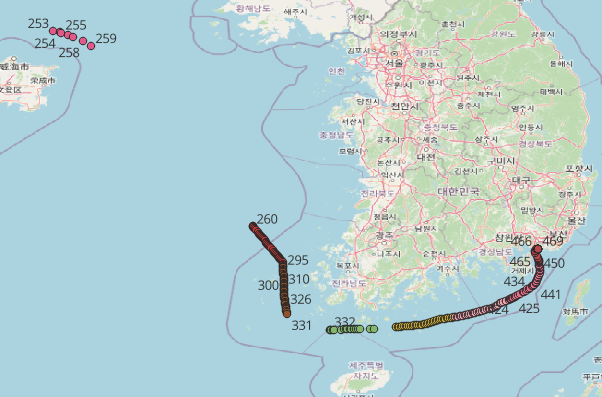

In [113]:
ddd[ddd["index"]==259]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
92,259,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,123.1017,37.6714,12.7,130.0,2022-11-03 04:30:14.513576,2022-11-02 19:29:39,2022-11-02 05:02:27,under way using engine,593.688223,807.468142,2022-11-04 08:26:14.513576,2022-11-04 16:30:58.726927,0 days 08:04:44.213351


In [116]:
ddd.loc[70:92,][['speed','timestamp',"ETA", "error"]]

,speed,timestamp,ETA,error
70,13.6,2022-11-02 22:36:53.307079,2022-11-04 06:53:53.307079,0 days 09:37:05.419848
71,13.6,2022-11-02 22:46:59.030831,2022-11-04 07:03:59.030831,0 days 09:26:59.696096
72,13.8,2022-11-02 22:57:05.351904,2022-11-04 07:14:05.351904,0 days 09:16:53.375023
73,13.3,2022-11-02 23:22:18.838157,2022-11-04 05:15:18.838157,0 days 11:15:39.888770
74,13.6,2022-11-02 23:42:30.928679,2022-11-04 05:35:30.928679,0 days 10:55:27.798248
75,13.8,2022-11-02 23:57:39.003847,2022-11-04 05:50:39.003847,0 days 10:40:19.723080
76,13.7,2022-11-03 00:07:44.866914,2022-11-04 06:00:44.866914,0 days 10:30:13.860013
77,13.6,2022-11-03 00:12:47.733684,2022-11-04 06:05:47.733684,0 days 10:25:10.993243
78,13.5,2022-11-03 00:22:53.083297,2022-11-04 06:15:53.083297,0 days 10:15:05.643630
79,13.6,2022-11-03 00:27:55.634161,2022-11-04 06:20:55.634161,0 days 10:10:03.092766


In [117]:
ddd[ddd["index"]==260]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
93,260,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-04 07:00:00,125.1712,35.3656,12.9,144.0,2022-11-03 17:31:38.547739,2022-11-03 08:30:58,2022-11-02 05:02:27,under way using engine,334.511845,459.477924,2022-11-04 12:13:38.547739,2022-11-04 16:30:58.726927,0 days 04:17:20.179188


In [118]:
ddd.loc[93:100][['speed','timestamp',"ETA", "error"]]

,speed,timestamp,ETA,error
93,12.9,2022-11-03 17:31:38.547739,2022-11-04 12:13:38.547739,0 days 04:17:20.179188
94,12.9,2022-11-03 17:33:27.379064,2022-11-04 12:15:27.379064,0 days 04:15:31.347863
95,12.9,2022-11-03 17:38:06.356699,2022-11-04 12:20:06.356699,0 days 04:10:52.370228
96,12.9,2022-11-03 17:43:08.878154,2022-11-04 12:25:08.878154,0 days 04:05:49.848773
97,12.9,2022-11-03 17:48:19.955822,2022-11-04 12:30:19.955822,0 days 04:00:38.771105
98,12.8,2022-11-03 17:58:16.994740,2022-11-04 12:40:16.994740,0 days 03:50:41.732187
99,12.7,2022-11-03 18:03:20.333773,2022-11-04 12:45:20.333773,0 days 03:45:38.393154
100,12.8,2022-11-03 18:08:23.022864,2022-11-04 12:50:23.022864,0 days 03:40:35.704063


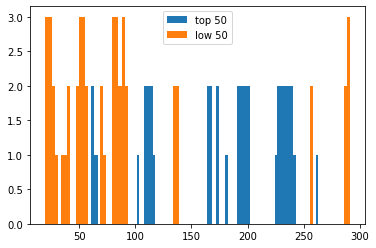

In [141]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(50).index.values,
         bins=100, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(50).index.values,
         bins=100, label="low 50")
plt.legend()
plt.show()